## 데이터 처리 환경설정

In [27]:
import pandas as pd
import openpyxl
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 

In [13]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기

개인정보 유출 때문에 개인 폴더에서 통일화 작업을 하고 불러옴

In [2]:
df_sam1 = pd.read_csv('./sample1.csv')
df_sam2 = pd.read_csv('./sample2.csv')

In [3]:
df_sam1.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,...,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,1,71,OD,2005-03-18 오후 12:57:56,NaN,2.8,5,41,1,14,...,-21,-7,-31,-10,-21,-9,-16,-19,-18,-24
1,1,71,OS,2005-03-18 오후 1:08:41,NaN,0.0,5,24,1,13,...,-11,-6,-16,-14,-8,-7,-1,-3,-3,-12


In [4]:
df_sam2.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,...,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,264,26,OD,2008-11-26 오후 4:38:34,NaN,0.0,1,4,2,19,...,-2,-3,-3,-3,-4,-3,-2,-3,-2,-4
1,264,26,OS,2008-11-04 오후 4:14:53,NaN,0.0,0,0,0,21,...,-2,-3,-3,-3,1,-2,-5,-2,-2,-7
2,264,26,OD,2008-11-04 오후 4:05:13,NaN,0.0,1,0,0,19,...,-5,-2,-2,-2,-7,-4,-2,-1,-2,-2
3,264,26,OS,2008-11-03 오후 4:40:56,NaN,0.0,0,6,0,20,...,-3,-3,-3,-4,-11,-8,-9,-6,-5,-6
4,264,26,OD,2008-11-03 오후 4:12:10,NaN,0.0,0,8,0,17,...,-4,-3,-11,-3,-4,-7,-5,-5,-7,-8


In [10]:
# 같은 사람끼리 묶고, 날짜 시간별로 정렬
df_sam2 = df_sam2.sort_values(['PID', 'AGE']).copy()

In [134]:
# 검사 값들
check_list = ['PDP', 'PDV', 'THV', 'TDP', 'TDV']

## 데이터 이상치 시각화 후 확인
   * 26, 35번 데이터는 측정이 안되는 것을 확인 - 맹점
   * 맹점 제외 특이 데이터는 없는 것으로 판단


PDP


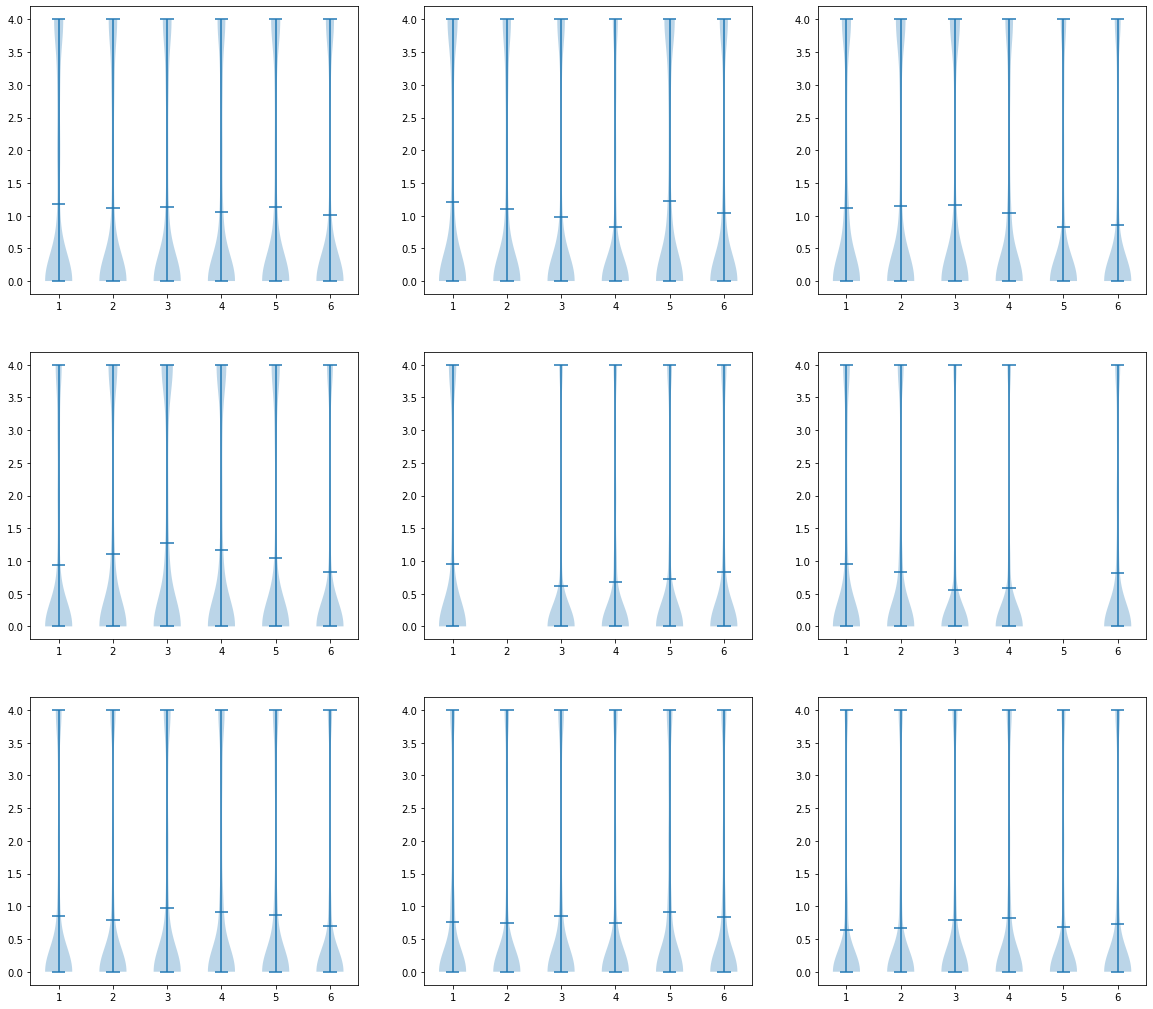


PDV


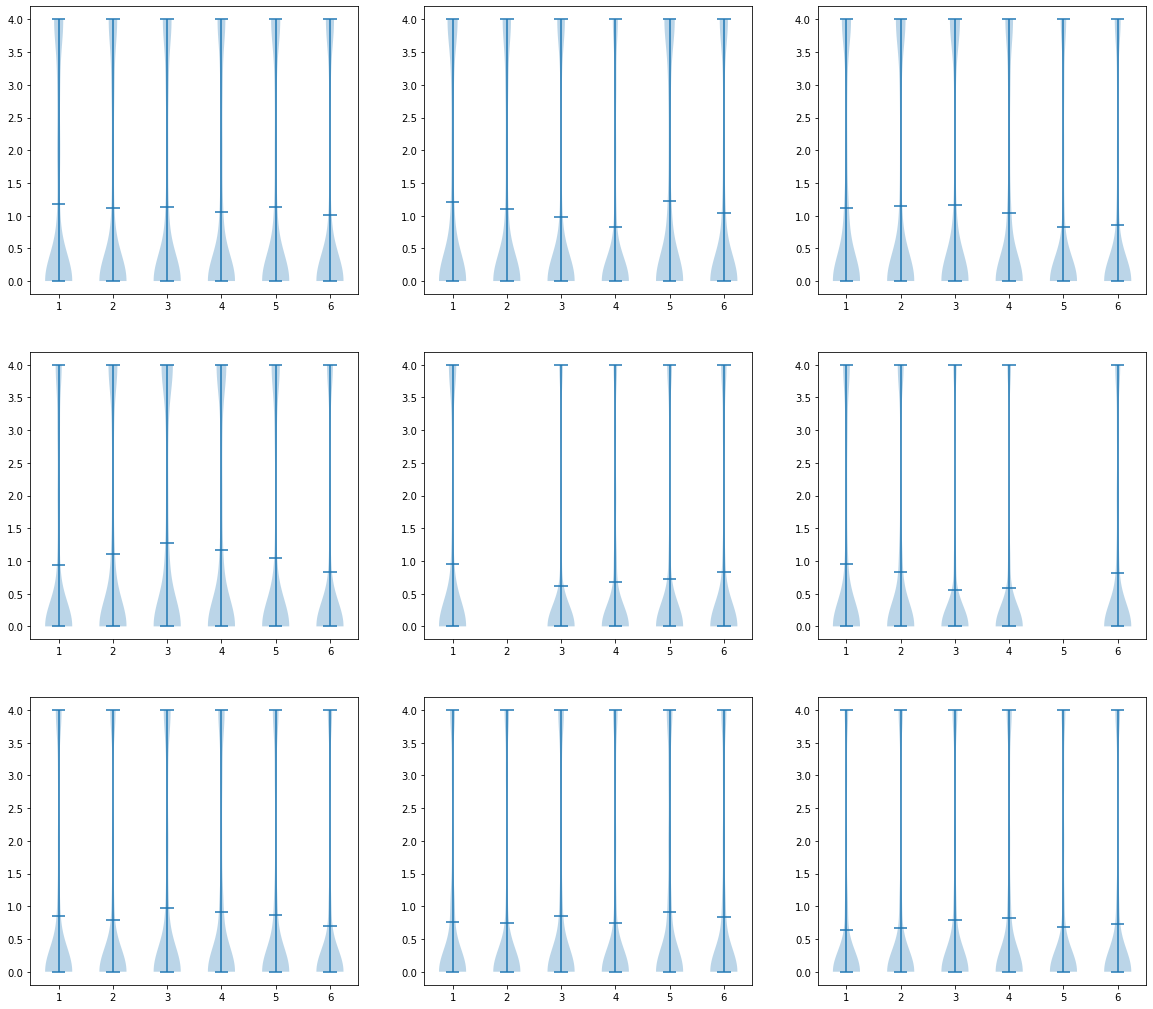


THV


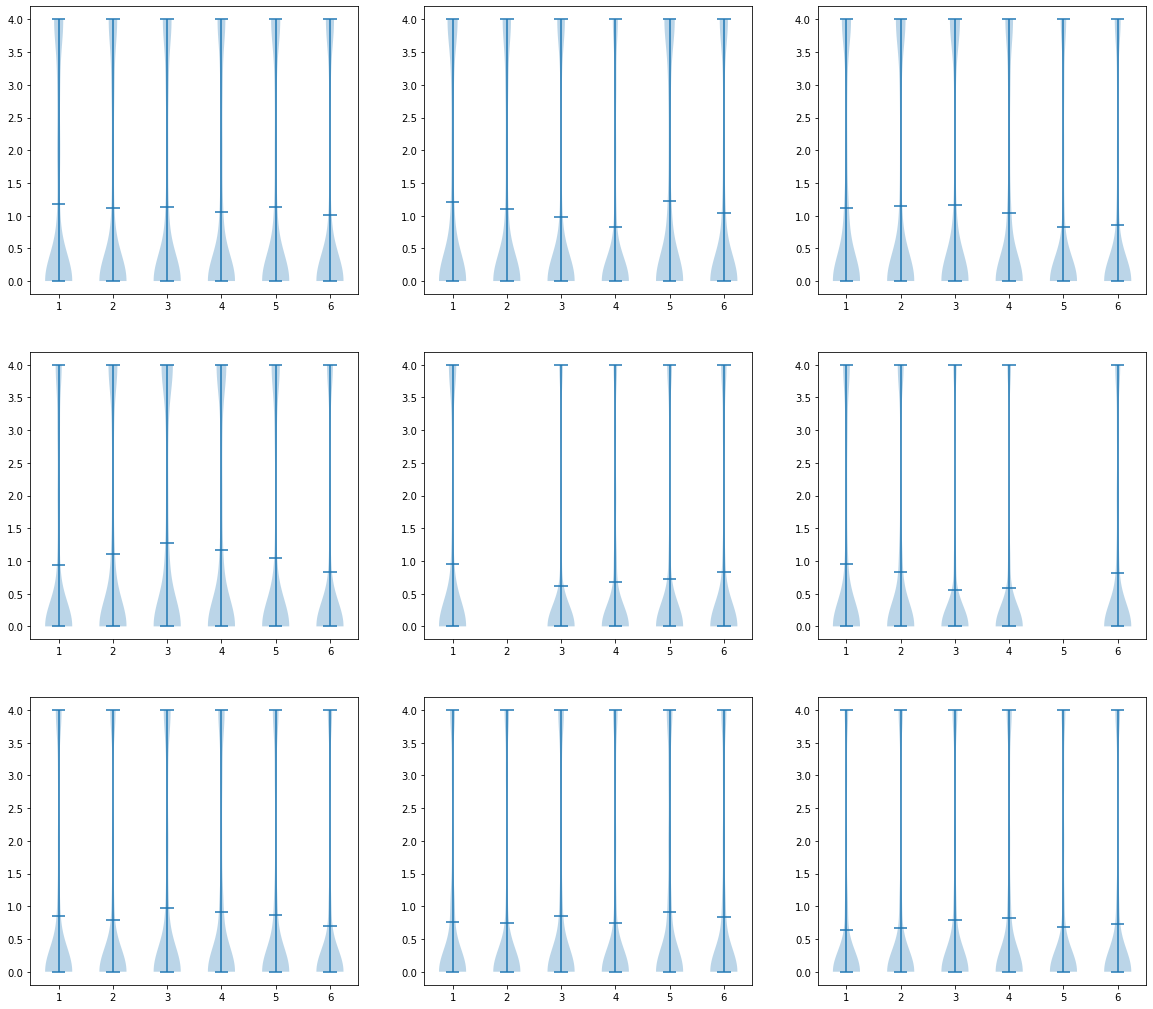


TDP


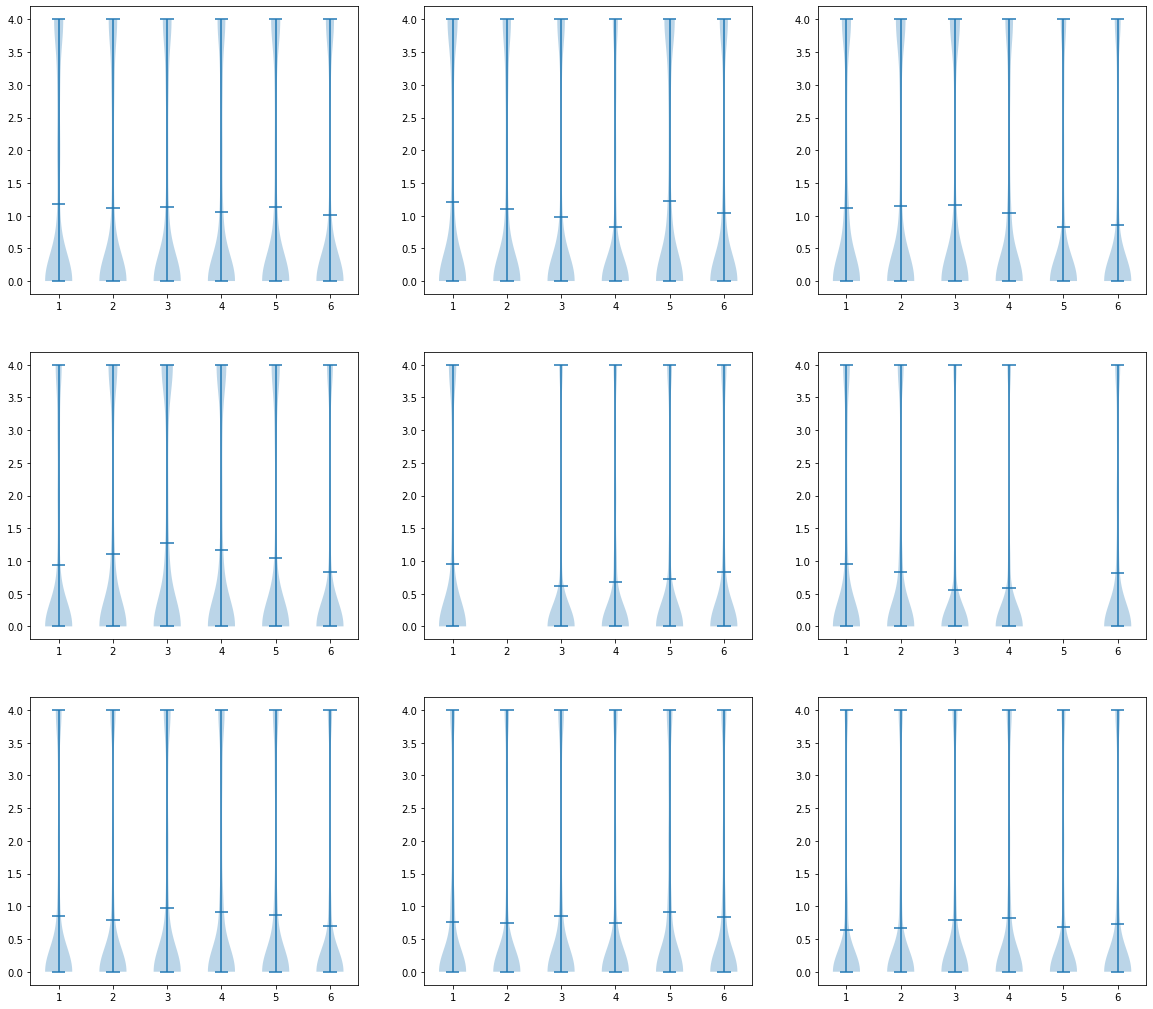


TDV


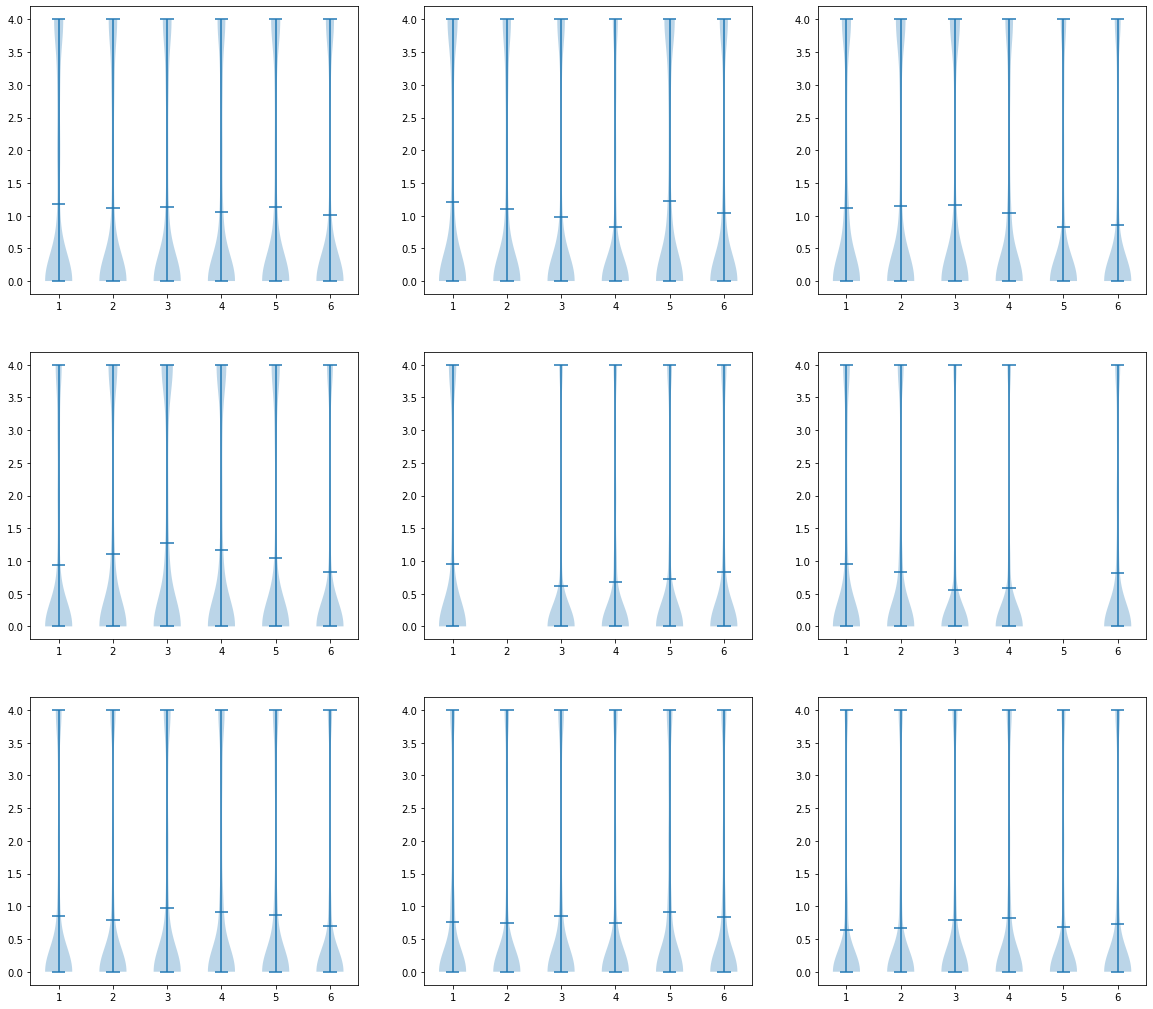

In [154]:
for m in range(len(check_list)):
    print()
    print(check_list[m])
    fig, axs = plt.subplots(3, 3, figsize = (20, 18))
    for k in range(0, 3):
        for i in range(0, 3):
            axs[k, i].violinplot([df_sam2.iloc[:, i] for i in range(17+6*i+18*k, 17+6*(i+1)+18*k)], showmeans = True)
    plt.show()

### 2번 환자를 예시로 작업 전개

In [79]:
pid_2 = df_sam2[(df_sam2['PID']==2) & (df_sam2['Eye']=='OS')].copy()

In [201]:
pid_2.columns

Index(['PID', 'AGE', 'Eye', 'Exam Date', 'Exam ID', 'Pupil diameter',
       'False positive percent', 'False negative percent', 'Fixation loss',
       'Fixation trial',
       ...
       'TDV_45', 'TDV_46', 'TDV_47', 'TDV_48', 'TDV_49', 'TDV_50', 'TDV_51',
       'TDV_52', 'TDV_53', 'TDV_54'],
      dtype='object', length=287)

In [160]:
from sklearn.linear_model import LinearRegression
import datetime as dt

In [168]:
pid_2['Exam Date'] = pid_2['Exam Date'].apply(lambda x : x[:10])

In [173]:
X = pd.to_datetime(pid_2['Exam Date']).map(dt.datetime.toordinal)

In [174]:
y = pid_2.iloc[:, 17:]

In [186]:
y = y.dropna(axis = 1)

In [187]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [190]:
X.iloc[-1]

736626

In [206]:
import numpy as np
predict_list = np.round(line_fitter.predict([[X.iloc[-1]+365]]), 1)[0]

In [213]:
y

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-2,3,-1,1,0,0,2,1,0,-1,0,0,-1,0,-2,0,0,-2,-2,-4,-4,-1,-1,-1,-1,-6,-2,-1,-1,-2,-3,1,-2,0,-1,1,-2,-1,1,-1,-1,0,-1,0,-1,0,-3,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,1,0,-1,1,0,-3,-1,0,-1,0,0,-1,1,2,1,0,2,3,-1,0,2,-1,0,-1,-1,-2,-2,0,-2,-2,1,0,-1,0,0,2,-1,0,-1,0,-1,-1,-2,-2,-2,-3,-2,-1,2,-1
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,...,-3,3,1,-1,0,-1,4,1,1,0,0,-1,0,1,0,-2,-3,-2,-1,-1,-2,-1,-5,-3,-1,0,0,-1,-2,-1,-5,0,2,-1,-1,-1,0,-1,-4,-1,-1,0,-1,-3,-1,-2,2,0,-1,0
15,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,-4,-1,-1,-1,1,1,3,-1,-1,0,-1,0,3,-1,0,-1,-2,-2,-2,-1,-3,0,2,-1,-1,-2,-2,0,1,-1,1,1,-1,-2,0,-1,2,-1,-2,-2,-2,0,2,1,0,0,-1,-1
20,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,5,0,1,-1,0,0,0,0,2,-3,-2,0,0,1,2,2,0,-1,2,7,1,0,0,-1,-1,-1,-1,1,-1,-2,2,1,3,0,0,-1,1,1,0,1,-1,1,-1,-1,1,1,1,1,0
22,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-2,-4,1,0,-3,-1,1,-2,-1,-2,-3,-1,1,-1,-2,-2,1,1,-2,0,0,-1,-1,-1,0,-1,-1,1,-1,-1,-1,1,1,0,-2,0,-2,1,-1,-2,-2,-2,-1,0,0,0,-2,0,-5,-2
17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,3,0,0,0,0,0,...,1,3,1,0,0,-1,2,2,-1,1,-2,0,1,1,2,0,2,1,-1,-2,1,1,-3,0,2,0,0,-1,-1,-1,0,-1,1,-2,-1,-1,-1,1,-3,-1,0,0,-3,1,1,2,2,1,2,-1


In [219]:
pd.DataFrame(predict_list, index = y.columns).T

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,0.0,0.0,0.0,0.4,0.2,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,1.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.6,-0.9,0.0,2.2,0.0,0.0,-0.9,0.0,0.1,0.8,0.0,-0.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,2.1,-0.2,-0.2,0.0,0.0,0.0,...,0.8,1.0,1.0,-0.3,-1.6,-0.7,1.4,0.4,-0.6,0.6,-3.5,-0.7,1.1,-0.0,1.6,-0.4,2.0,1.1,-1.2,0.1,3.1,0.9,-2.5,0.1,1.9,1.3,0.1,-0.5,-0.4,-0.4,0.0,-0.2,2.2,-0.5,-1.3,-1.5,-1.0,1.5,-2.1,-1.3,-0.3,-1.1,-1.8,0.8,1.3,2.3,2.0,1.1,-0.8,-1.5


In [221]:
pd.concat([y, pd.DataFrame(predict_list, index = y.columns).T])

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,3.0,-1.0,1.0,0.0,0.0,2.0,1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-2.0,0.0,0.0,-2.0,-2.0,-4.0,-4.0,-1.0,-1.0,-1.0,-1.0,-6.0,-2.0,-1.0,-1.0,-2.0,-3.0,1.0,-2.0,0.0,-1.0,1.0,-2.0,-1.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-3.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-1.0,1.0,0.0,-3.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,2.0,1.0,0.0,2.0,3.0,-1.0,0.0,2.0,-1.0,0.0,-1.0,-1.0,-2.0,-2.0,0.0,-2.0,-2.0,1.0,0.0,-1.0,0.0,0.0,2.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-2.0,-2.0,-2.0,-3.0,-2.0,-1.0,2.0,-1.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-3.0,3.0,1.0,-1.0,0.0,-1.0,4.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,-2.0,-3.0,-2.0,-1.0,-1.0,-2.0,-1.0,-5.0,-3.0,-1.0,0.0,0.0,-1.0,-2.0,-1.0,-5.0,0.0,2.0,-1.0,-1.0,-1.0,0.0,-1.0,-4.0,-1.0,-1.0,0.0,-1.0,-3.0,-1.0,-2.0,2.0,0.0,-1.0,0.0
15,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,-4.0,-1.0,-1.0,-1.0,1.0,1.0,3.0,-1.0,-1.0,0.0,-1.0,0.0,3.0,-1.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,-3.0,0.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,1.0,-1.0,1.0,1.0,-1.0,-2.0,0.0,-1.0,2.0,-1.0,-2.0,-2.0,-2.0,0.0,2.0,1.0,0.0,0.0,-1.0,-1.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,2.0,-3.0,-2.0,0.0,0.0,1.0,2.0,2.0,0.0,-1.0,2.0,7.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-2.0,2.0,1.0,3.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0
22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-4.0,1.0,0.0,-3.0,-1.0,1.0,-2.0,-1.0,-2.0,-3.0,-1.0,1.0,-1.0,-2.0,-2.0,1.0,1.0,-2.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,-2.0,0.0,-2.0,1.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,0.0,-5.0,-2.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,-1.0,2.0,2.0,-1.0,1.0,-2.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,-1.0,-2.0,1.0,1.0,-3.0,0.0,2.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,-2.0,-1.0,-1.0,-1.0,1.0,-3.0,-1.0,0.0,0.0,-3.0,1.0,1.0,2.0,2.0,1.0,2.0,-1.0
0,0.0,0.0,0.0,0.4,0.2,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,1.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.6,-0.9,0.0,2.2,0.0,0.0,-0.9,0.0,0.1,0.8,0.0,-0.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,2.1,-0.2,-0.2,0.0,0.0,0.0,...,0.8,1.0,1.0,-0.3,-1.6,-0.7,1.4,0.4,-0.6,0.6,-3.5,-0.7,1.1,-0